In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [287]:
boston = datasets.load_boston()

In [ ]:
boston

In [289]:
# converting to np array

feature_names = np.array(boston.feature_names)
x = np.array(boston.data)
y = np.array(boston.target)

In [290]:
feature_names.shape, x.shape, y.shape

((13,), (506, 13), (506,))

In [291]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [292]:
y.min(), y.max(), y.mean()

(5.0, 50.0, 22.532806324110677)

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [305]:
# feature scaling
# using the RobustScaler() -> works well with outliers

scaler_x = RobustScaler()
scaler_y = RobustScaler()

In [295]:
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [296]:
Y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
Y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [297]:
# reshaping back to 1D array
Y_train = Y_train.reshape(-1, )
Y_test = Y_test.reshape(-1, )
print(Y_train.shape, Y_test.shape)

(404,) (102,)


In [298]:
clf = LinearRegression()

In [299]:
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [300]:
Y_pred = clf.predict(X_test)

In [307]:
print("Accuracy on training data : ",clf.score(X_train, Y_train) )

Accuracy on training data :  0.725059813365


In [308]:
print("Accuracy on testing data : ",clf.score(X_test, Y_test))

Accuracy on testing data :  0.785754883752


In [309]:
print("Mean squared error : ", mean_squared_error(Y_test, Y_pred))

Mean squared error :  0.32332689236


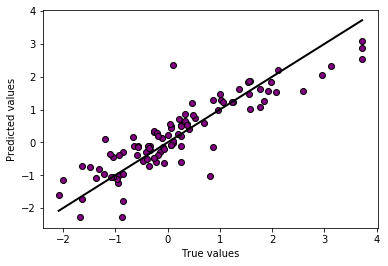

In [325]:

plt.scatter(Y_test, Y_pred, color="purple", edgecolors=(0, 0, 0))
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=2)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()